In [1]:
import numpy as np 
import pandas as pd
from mplsoccer import Pitch, Sbopen
import matplotlib.pyplot as plt

In [2]:
parser = Sbopen()
df, related ,freeze, tactics = parser.event(22912)

In [3]:
#remoive substitutes
sub = df.loc[df['type_name'] == 'Substitution'].loc[df['team_name']=='Liverpool'].iloc[0]['index']

mask_cmd = (df['type_name'] == 'Pass')  & (df['team_name'] == 'Liverpool') & (df['index'] < sub) & (df['outcome_name'].isnull())

df_pass = df.loc[mask_cmd,['x','y','end_x','end_y','player_name','pass_recipient_name']]

df_pass['player_name'] = df_pass['player_name'].apply(lambda x: str(x).split()[-1])
df_pass['pass_recipient_name'] = df_pass['pass_recipient_name'].apply(lambda x: str(x).split()[-1])

In [4]:
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name
4,61.0,40.1,34.0,43.8,Henderson,Matip
20,59.5,19.6,65.4,19.2,Dijk,Wijnaldum
24,64.7,18.4,64.9,23.8,Wijnaldum,Henderson
27,64.3,24.3,99.2,24.5,Henderson,Mané
65,43.7,0.1,53.6,8.5,Robertson,Mané
...,...,...,...,...,...,...
1912,54.4,34.8,102.0,55.5,Wijnaldum,Salah
1927,91.1,48.9,91.8,59.1,Wijnaldum,Henderson
1930,91.8,59.1,83.9,48.3,Henderson,Tavares
1933,83.9,48.3,83.2,20.8,Tavares,Robertson


In [5]:
scatter_df = pd.DataFrame()
for i , name in enumerate(df_pass['player_name'].unique()):
    passx=df_pass.loc[df_pass['player_name'] == name]['x'].to_numpy()
    recx=df_pass.loc[df_pass['pass_recipient_name'] == name]['end_x'].to_numpy()
    passy=df_pass.loc[df_pass['player_name'] == name]['y'].to_numpy()
    recy=df_pass.loc[df_pass['pass_recipient_name'] == name]['end_y'].to_numpy()
    scatter_df.at[i,'player_name'] = name

    scatter_df.at[i,'x'] = np.mean(np.concatenate([passx,recx]))
    scatter_df.at[i,'y'] = np.mean(np.concatenate([passy,recy]))

    scatter_df.at[i,'no'] = df_pass.loc[df_pass['player_name'] == name].count().iloc[0]

scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)


In [6]:
scatter_df
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name
4,61.0,40.1,34.0,43.8,Henderson,Matip
20,59.5,19.6,65.4,19.2,Dijk,Wijnaldum
24,64.7,18.4,64.9,23.8,Wijnaldum,Henderson
27,64.3,24.3,99.2,24.5,Henderson,Mané
65,43.7,0.1,53.6,8.5,Robertson,Mané
...,...,...,...,...,...,...
1912,54.4,34.8,102.0,55.5,Wijnaldum,Salah
1927,91.1,48.9,91.8,59.1,Wijnaldum,Henderson
1930,91.8,59.1,83.9,48.3,Henderson,Tavares
1933,83.9,48.3,83.2,20.8,Tavares,Robertson


In [7]:
df_pass['pair_key'] = df_pass.apply(lambda x: '_'.join(sorted([x['player_name'], x['pass_recipient_name']])) , axis=1)
lines_df = df_pass.groupby(['pair_key']).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns',inplace=True)

lines_df = lines_df[lines_df['pass_count']>2]

In [8]:
lines_df

,pair_key,pass_count
2,Alexander-Arnold_Henderson,6
4,Alexander-Arnold_Matip,3
7,Alexander-Arnold_Salah,4
9,Alexander-Arnold_Wijnaldum,3
10,Becker_Dijk,10
12,Becker_Matip,5
13,Becker_Robertson,4
14,Becker_Tavares,3
15,Dijk_Henderson,3
17,Dijk_Matip,9


In [9]:
scatter_df

,player_name,x,y,no,marker_size
0,Henderson,73.953571,49.389286,14.0,913.043478
1,Dijk,28.863636,27.106061,18.0,1173.913043
2,Wijnaldum,72.200000,28.795238,12.0,782.608696
3,Robertson,54.467442,9.339535,23.0,1500.000000
4,Mané,75.880645,19.290323,12.0,782.608696
5,Matip,31.945833,51.933333,14.0,913.043478
6,Tavares,59.366667,44.861111,9.0,586.956522
7,Alexander-Arnold,62.552000,65.420000,13.0,847.826087
8,Becker,11.184000,39.716000,15.0,978.260870
9,Salah,93.511765,57.476471,5.0,326.086957


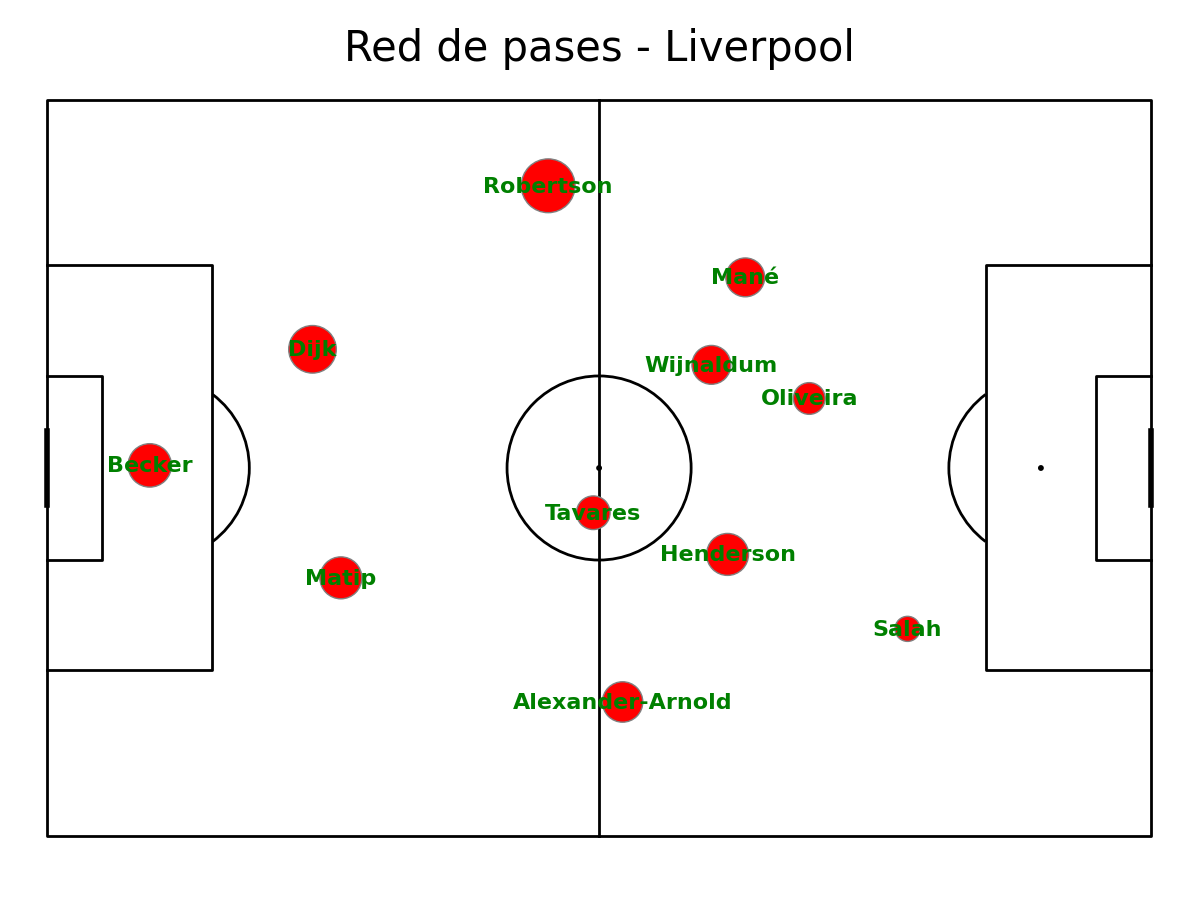

In [26]:
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0,endnote_space=0)

sc = pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color="red", edgecolors = 'grey',linewidth =1,alpha=1, ax=ax['pitch'] )


for i,row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row['x'],row['y']),c='green',va='center',ha='center',weight = 'bold',size = 16,ax=ax['pitch'])

    
fig.suptitle("Red de pases - Liverpool", fontsize = 30)
plt.show()

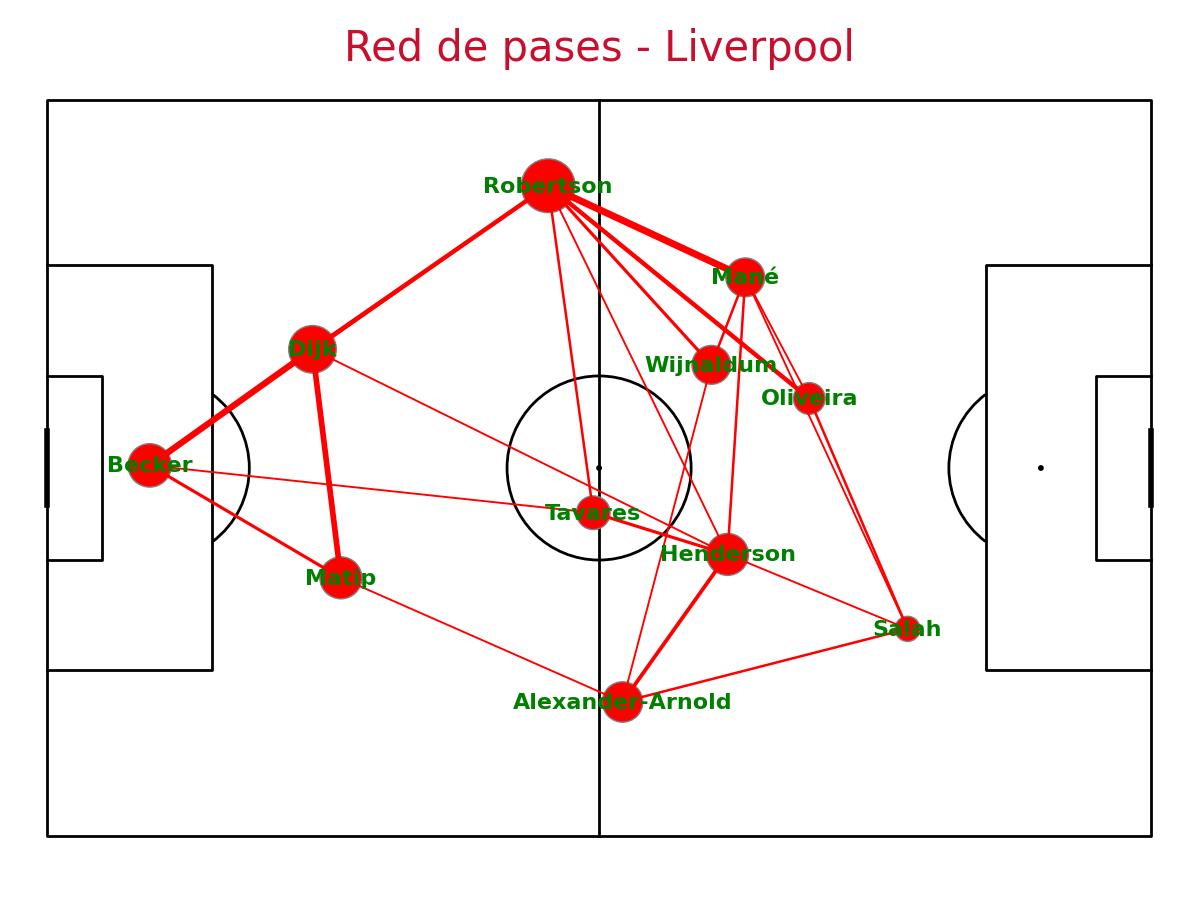

In [28]:
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0,endnote_space=0)

sc = pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color="red", edgecolors = 'grey',linewidth =1,alpha=1, ax=ax['pitch'] )


for i,row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row['x'],row['y']),c='green',va='center',ha='center',weight = 'bold',size = 16,ax=ax['pitch'])

for i, row in lines_df.iterrows():
    player1 = row["pair_key"].split("_")[0]
    player2 = row["pair_key"].split("_")[1]

    player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
    player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
    player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
    player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
    num_passes = row["pass_count"]

    line_width = (num_passes/ lines_df['pass_count'].max()*5)

    pitch.lines(player1_x,player1_y,player2_x,player2_y, alpha=1, lw= line_width, zorder=2, color='red', ax = ax['pitch'] )
    
fig.suptitle("Red de pases - Liverpool", fontsize = 30, c = '#c8102E')
plt.show()